In [1]:
import cv2
import numpy as np
import requests
from PIL import Image

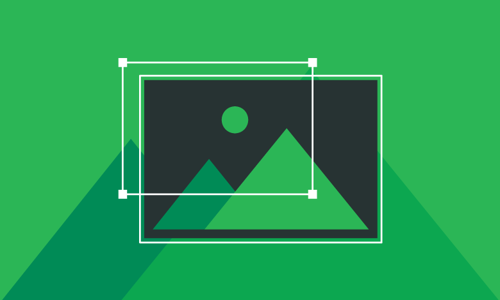

In [6]:
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

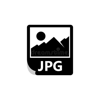

In [73]:
logo = Image.open(requests.get('https://thumbs.dreamstime.com/b/jpg-file-icon-logo-element-illustration-design-155443757.jpg', stream=True).raw)
logo = logo.resize((100,100))
logo

In [74]:
image_logow = Image.fromarray(image_logow)
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [75]:
center_y = int(h_image/2)
center_x = int(w_image/2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo


In [76]:
roi = image_logow[top_y: bottom_y, left_x: right_x]
result = cv2.addWeighted(roi, 1, logo, 1, 0)
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0,0,255),1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0,0,255),1)

image_logow[top_y: bottom_y, left_x: right_x] = result


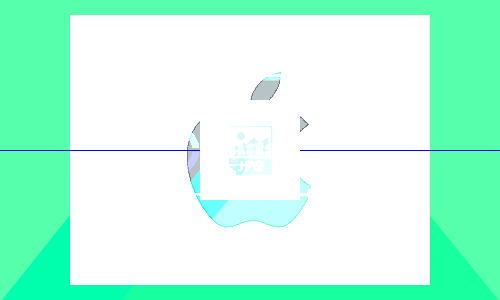

In [77]:
img = Image.fromarray(image_logow, 'RGB')
img

In [78]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Watermark', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

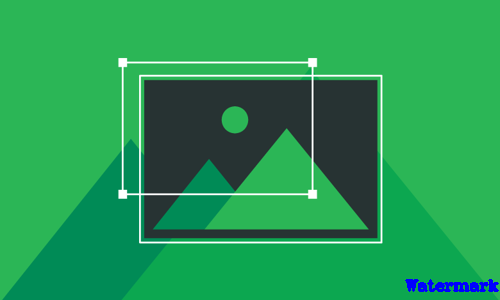

In [79]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg